** Homework six (25 Points)**

• (Reading) Ch5, Machine Learning [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), up to and including Linear Regression; and the in-class reading ** cross_validation_forEconomists ** on polylearn. 

• (UnGraded) DataCamp chapter in Supervised Learning with scikit-learn: **Regression** and **Fine Tuning Your Model**. For the Tuning chapter focus on the lessons including and following (Hyperparameter tuning). Quiz questions will be from these chapters and the reading.

• (Graded) Below notebook on fine tuning your model. If you're working in a group (max 3 people) please do submit it as a group. Submit only one assignment. You will both receive credit. This homework is longer and will count as hw6 and hw7 - 20 points. The code is very similar to our in-class exercise, therefore, points are granted for understanding of the output. 

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

/Users/Sam/feelinglucky/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Sam/feelinglucky/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the Ladybug data
'''In 1983 an article was published about ladybird beetles and their 
behavior changes under different temperature conditions (N. H. Copp. Animal Behavior, 31,:424-430). 
An experiment was run to see how many beetles stayed in light as temperature changed.
'''

# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
y = df[['Lighted']]
X = df[['Temp']]

In [3]:
# Show the first 5 observations (1 point)
df.head()# your code here

,Temp,Lighted
0,-2,28
1,-1,29
2,0,22
3,1,28
4,2,34


# Linear Regression, Part I  

In [4]:
# (1 point)
# Create training and test sets with 0.3 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Create linear regression object call ols
ols = LinearRegression()
  
# Train the model using the training sets
ols.fit(X_train, y_train)# your code here

# Report the coefficient 
ols.coef_# your code here   

/Users/Sam/feelinglucky/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([[0.54097855]])

## Plot outputs

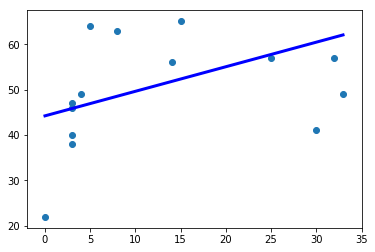

In [5]:
# (1 point)
# This plots the predicted ols fitted line
min = X_test.min()
max = X_test.max() 
predictor_space = pd.DataFrame(np.arange(min, max,  0.05))
plt.plot(predictor_space, ols.predict(predictor_space), color='blue', linewidth=3)

# Scatter plot the actual test data 
plt.scatter(X_test, y_test)# your code here


## Predict on the Test data

In [6]:
# Get the predicted y_pred using the test data
y_pred = ols.predict(X_test)

# Compute and print the R^2 and RMSE
print("R^2: {}".format(ols.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.006138457830477506
Root Mean Squared Error: 11.482989980431716


## a. Does this plot look like a good fit to the data? # (1 point)
    The plot seems to make some sort of fit of the data, but it is very hard to tell if it is a good fit because its variance is so low when the data is making multiple curves. The bias is very high though because it only goes in one straight direction.
## b. What do out of sample metrics tell you? (1 point)
    The output sample metrics tell me the line is not a good fit because the R2 is low which essentially means it doesn't fit the model very wel. The mean squared error seems to be high from the little bit of experience I have, but I would need to see other mean squared errors for different plots to conclude it is in fact high.
### your answer here

# Polynomial Regression, Part II

In [24]:
#(2 points)
# Reload the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")

# Create arrays for features (Lighted) and target variable (Temp)
yp = df[['Lighted']]
Xp = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
Xp = pd.DataFrame(poly.fit_transform(Xp))
print("Dimensions of X after reshaping: {}".format(Xp.shape))

# Create training and test sets with .3 test size
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size = 0.3)# your code here


# Create linear regression object, ols2
ols2 = LinearRegression()# your code here
  
# Fit the model using the training sets
ols2.fit(Xp_train, yp_train)# your code here
  
# Report the coefficients
ols2.coef_# your code here                    
  

Dimensions of X after reshaping: (44, 16)


array([[ 0.00000000e+00, -5.54020979e-10,  6.80924217e-13,
         7.82744454e-13,  8.57568478e-12,  8.66213860e-11,
         7.81723766e-10,  5.96758534e-09,  3.45637105e-08,
         1.13941916e-07, -2.66561434e-08,  2.51088674e-09,
        -1.24376275e-10,  3.43066839e-12, -5.00316598e-14,
         3.01608871e-16]])

## Plot outputs

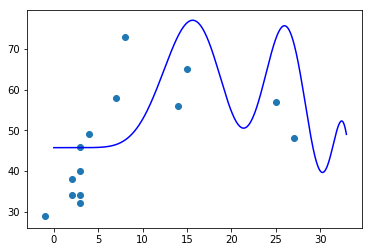

In [8]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ols2.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
plt.scatter(Xp_test.iloc[ :, [1]], yp_test)# your code here

## Predict on the Test data

In [9]:
#(1 point)
# Predict on the test data: y_pred
yp_pred = ols2.predict(Xp_test)# your code here

# Compute and print R^2 and RMSE
print("R^2: {}".format(ols2.score(Xp_test, yp_test)))
rmsep = np.sqrt(mean_squared_error(yp_test, yp_pred))
print("Root Mean Squared Error: {}".format(rmsep))# your code here

R^2: -0.22804514072207227
Root Mean Squared Error: 14.280649331647469


## a. Does this plot look better than the previous OLS plot? (1 point)
    This plot may look a little more appropriate for the data, but it is just the opposite extreme from the straight line in the previous fit. This line is overfit to the data trying to account for every variation in the data. It has low bias, but its variance is too high to be practical for other sets of data.
## b. Why? What do out of sample metrics tell you? (1 point)
    The out of sample metrics say that the fit is terrible with R2 being as low as it is and the mean squared error is even higher than the linear fit in the previous graph making this a worse Linear Regression model.
### your answer here

# Ridge Regression, Part III

In [14]:
#(1 point)
# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")# your code here

# Create arrays for features (Lighted) and target variable (Temp)
yr = df[['Lighted']]# your code here
Xr = df[['Temp']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)
Xr = pd.DataFrame(poly.fit_transform(Xr))
print("Dimensions of X after reshaping: {}".format(Xr.shape))# your code here
  
# Create training and test sets
#print(Xr)
#print(yr)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.3)# your code here
#Xr_train = np.array(yr).reshape(len(Xr), 1).astype(np.float)
#yr_train = np.array(Xr)

#Xr_train = Xr_train.transpose()
#yr_train = yr_train.transpose()
# Create a ridge regressor object called ridge with lambda = 0.1
ridge = Ridge(normalize = True, alpha = 0.1)

# Train the ridge model using the training sets (the polynomial factors are in the data)
#print (Xr_train)
#print (yr_train)
ridge.fit(Xr_train, yr_train)# your code here

# The coefficients
ridge.coef_# your code here

Dimensions of X after reshaping: (44, 16)


array([[ 0.00000000e+00,  1.21727381e+00, -6.46085529e-04,
        -3.18604565e-04, -1.07800978e-05, -2.79637370e-07,
        -6.41609303e-09, -1.32053763e-10, -2.28848347e-12,
        -2.38294658e-14,  4.74842603e-16,  4.57997142e-17,
         2.21249117e-18,  8.87004926e-20,  3.25604057e-21,
         1.13532810e-22]])

## Plot outputs

R^2: 0.10918320205972155
Root Mean Squared Error: 9.33274166132209


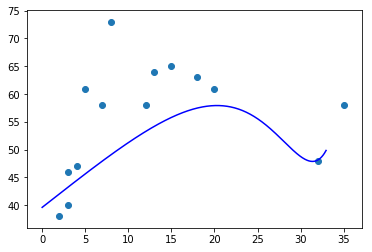

In [18]:
#(1 point)
# This plots the predicted ols fitted line
predictor_space = pd.DataFrame(np.arange(min, max, 0.05))# your code here (see code above in Part II plot outputs for help)
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space))
plt.plot(predictor_space, ridge.predict(predictor_poly), color='blue')
# Scatter plot the actual test data
plt.scatter(Xr_test.iloc[ : , [1]], yr_test)# your code here

yr_pred = ridge.predict(Xr_test)

print("R^2: {}".format(ridge.score(Xr_test, yr_test)))
rmser = np.sqrt(mean_squared_error(yr_test, yr_pred))
print("Root Mean Squared Error: {}".format(rmser))

## a. Does this plot look better than the previous Polynomial plot? (1 point)
    The plot definitely looks better as if it is demonstrating general trends in the data but not fitting too closesly. It definitely is more balanced when it comes to variance and bias.
## b. Why? What do out of sample metrics tell you? (1 point)
    Out of sample metrics tell me the fit is still not very good with the R2 being so low, but the mean squared error is definitely better to a degree from those above 10 from the graphs before.
### your answer here

# Get the 5 fold CV Scores (R2) for all 3 models

In [20]:
#(1 points)

#ols
ols_scores = cross_val_score(ols, X, y, cv = 5, scoring = 'r2')
print("Cross-validated OLS scores:", ols_scores)

#ols2
poly_scores = cross_val_score(ols2, Xp, yp, cv = 5, scoring = 'r2')# your code here
print("Cross_validated OLS2 scores:", poly_scores)# your code here

# ridge
ridge_scores = cross_val_score(ridge, Xr, yr, cv = 5, scoring = 'r2')# your code here
print("Cross_validated Ridge scores:", ridge_scores)# your code here

Cross-validated OLS scores: [-30.75075459  -0.04556113 -14.29669246  -2.24972457 -29.57476511]
Cross_validated OLS2 scores: [-2.54035612e+01 -5.03616771e-03 -1.74024921e+01 -3.37559173e+01
 -9.09222454e+14]
Cross_validated Ridge scores: [-2.33809737e+01  2.19479692e-01 -1.09999672e+01 -4.16344039e-01
 -7.06842774e+04]


## Explain which model if any is best and why. (1 point)
    None of them are very good considering many if not all of their R2 values come out negative demonstrating bad fits. But, if I had to choose it would be the ridge model because it has one positive fit and the spread across the R2 values is kept minimal compared to the larger numbers for the other fits. 
### your answer here

# Hyper Tune Lambda, K-fold Grid Search, Ridge Regression, Part IV

In [21]:
#(4 points)

# Read the CSV file into a DataFrame: df
df = pd.read_csv("LadyBugs.csv")# your code here

# Create arrays for features (Lighted) and target variable (Temp)
X = df[['Temp']]# your code here
y = df[['Lighted']]

# Add in 15-degree polynomial of the X variables
poly = PolynomialFeatures(degree = 15)# your code here
X = pd.DataFrame(poly.fit_transform(X))
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Setup a grid of lambdas (aka alphas) called param_grid
param_grid = {'alpha': np.linspace(0.001, 2.0, num = 20)}

# Create a ridge regressor object called ridge
ridge = Ridge(normalize = True) 

# Setup the GridSearchCV object called grid_ridge for 5 folds using the param_grid above
grid_ridge = GridSearchCV(ridge, param_grid, cv = 5)

# Train the model using the training sets 6 folds for all lambdas!
grid = grid_ridge.fit(X_train, y_train)

#Get the best lambda
best = grid.best_params_# your code here

# Create a final ridge regressor object called ridge_final using the best lambda from hypertuning
ridge_final = Ridge(alpha = best['alpha'], normalize = True)

# Now fit this model on the test data 
ridge_final.fit(X_test, y_test)# your code here


Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

## Plot outputs

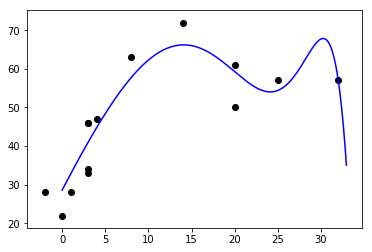

In [22]:
#(1 point)
predictor_space = pd.DataFrame(np.arange(min, max, 0.05)) # Creates prediction space on x interval
predictor_poly = pd.DataFrame(poly.fit_transform(predictor_space)) # Creates data to predict on
plt.plot(predictor_space, ridge_final.predict(predictor_poly), color='blue') # Plot fitted model 

# Scatter plot the actual test data
plt.scatter(X_test.iloc[ : , [1]], y_test, color = 'black')# your code here

## Final scores given tuned lambda

In [23]:
#(1 point)
# Predict on the test data: y_pred
# your code here
y_pred = ridge_final.predict(X_test)# your code here

# Compute and print R^2 and RMSE
print("R^2: {}".format(ridge_final.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
# Compute and print R^2 and RMSE
# your code here

R^2: 0.8474607930621084
Root Mean Squared Error: 5.703896361990161


## a. How does your final score (R2) compare to before? (1 point)
    The final R2 value is much better, closer to 1 than before, indicating a hyper-tuned lambda gives us a more accurate and better fitting polynomial to predict data based on the training data. Random test data seems to be fit well based on the training data showing the regression is fairly accurate.
## b. What about your fit to the data graphically? (1 point)
    The graph looks quite accurate but not too overfit. It has a decent amount of variance but not too much and it is definitely not overly-bias with the curves it integrates.
## c. Why do you think the fit is better or worse using Ridge and hypertuning your lambda paramater? (2 point)
    The fit is better hyper-tuning our lambda because we choose a better lambda for the data that corresponds to good fits with the training data amongst five different folds in this case. We basically use different situations and use the lambda that gives us the most accurate or best fit results. Then, we don't bias our results by using a set of test data independent from the training data to make a significantly fair conclusion.
### your answer here